**Assignment - 3**


Team Members:


Sanjeeth Busnur Indushekar(224133)

Suraj Shashidhar(230052)

Aditya Dey(230580

### CNN on MNIST Dataset

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image


In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [0]:
from datasets import MNISTDataset

In [19]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [20]:
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("test_images shape: " + str(test_images.shape))
print("test_labels shape: " + str(test_labels.shape))
print("total number of training samples: " + str(train_images.shape[0]))
print("total number of test samples: " + str(test_images.shape[0]))

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)
total number of training samples: 60000
total number of test samples: 10000


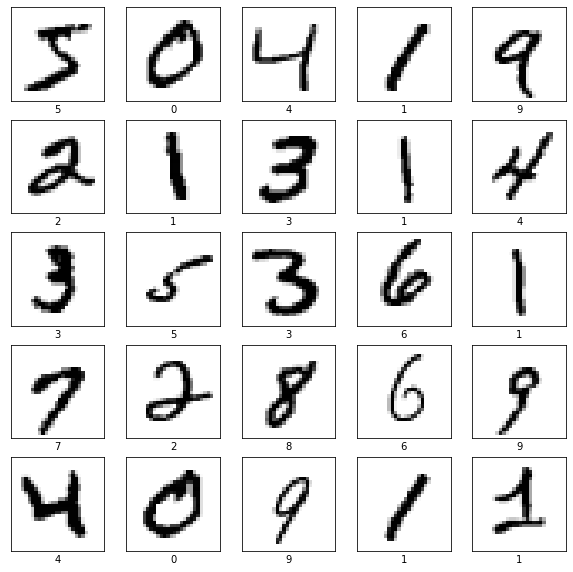

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images.astype(np.float32)/255.0, train_labels.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images.shape[0]).batch(32)

test_data = tf.data.Dataset.from_tensor_slices(( test_images.astype(np.float32)/255.0, test_labels.astype(np.int32) ))

test_data = test_data.batch(32)

In [0]:
model = keras.Sequential([layers.Conv2D(64,(3,3),activation='relu',padding='same',input_shape=(28,28,1)),
                        layers.MaxPool2D(),
                          layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                          layers.MaxPool2D(), 
                          layers.Flatten(), 
                          layers.Dense(64, activation='relu'), 
                          layers.Dense(10) ])

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=  5 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [0]:
layer_outputs = [layer.output for layer in classifier.layers[:12]] # Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=classifier.input, outputs=layer_outputs)

In [0]:
epochs=5
for epoch in range(epochs):
  print("===== epoch number: {}".format(epoch))

  for step, (x_batch_train, y_batch_train) in enumerate(train_data):

    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training=True)
      
      loss_value = loss_fn(y_batch_train, logits)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    # Update training metric.
    train_acc_metric(y_batch_train, logits)

    # Log every 200 batches.
    if step % 500 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

  # Display metrics at the end of each epoch.
  train_acc = train_acc_metric.result()
  print('Training acc over epoch: %s' % (float(train_acc),))
  # Reset training metrics at the end of each epoch
  train_acc_metric.reset_states()

  for x_batch_val, y_batch_val in test_data:
    val_logits = model(x_batch_val)
    # Update val metrics
    val_acc_metric(y_batch_val, val_logits)
  val_acc = val_acc_metric.result()
  val_acc_metric.reset_states()
  print('Validation acc: %s' % (float(val_acc),))

===== epoch number: 0
Training loss (for one batch) at step 0: 2.3208580017089844
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.021150968968868256
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.013653160072863102
Seen so far: 64064 samples
Training loss (for one batch) at step 1500: 0.23484958708286285
Seen so far: 96064 samples
Training acc over epoch: 0.9663833379745483
Validation acc: 0.9846000075340271
===== epoch number: 1
Training loss (for one batch) at step 0: 0.004792222753167152
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.03333008289337158
Seen so far: 32064 samples
Training loss (for one batch) at step 1000: 0.026621289551258087
Seen so far: 64064 samples
Training loss (for one batch) at step 1500: 0.0020505518186837435
Seen so far: 96064 samples
Training acc over epoch: 0.9853166937828064
Validation acc: 0.983299970626831
===== epoch number: 2
Training loss (for one batch) at step 0: 0.006548939272761

Conclusion: Using CNN based models, we were able to achieve a test accuracy of 98.9% compared to Just MLP based models where we achieved around 97% results for around same number of parameters [250k-300k]

### CNN on Fashion MNIST and Exploring Feature Maps

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [46]:
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("test_images shape: " + str(test_images.shape))
print("test_labels shape: " + str(test_labels.shape))
print("total number of training samples: " + str(train_images.shape[0]))
print("total number of test samples: " + str(test_images.shape[0]))

train_images shape: (60000, 28, 28)
train_labels shape: (60000,)
test_images shape: (10000, 28, 28)
test_labels shape: (10000,)
total number of training samples: 60000
total number of test samples: 10000


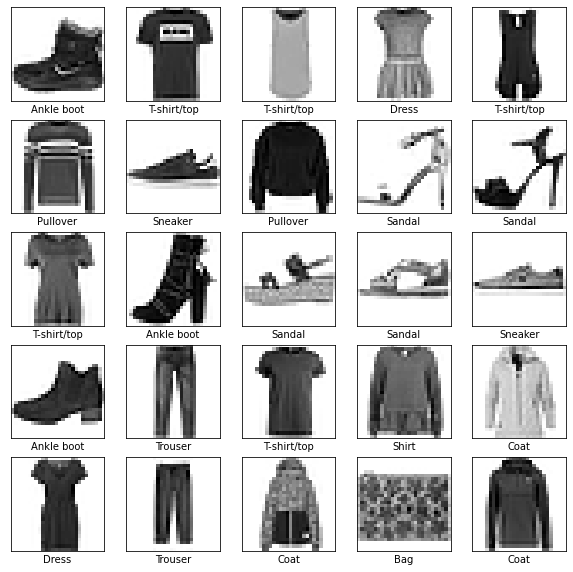

In [47]:
plt.figure(figsize=(10,10))
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images.astype(np.float32)/255.0, train_labels.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images.shape[0]).batch(64)

test_data = tf.data.Dataset.from_tensor_slices(( test_images.astype(np.float32)/255.0, test_labels.astype(np.int32) ))

test_data = test_data.batch(64)

In [0]:
model = keras.Sequential([layers.Conv2D(128,(3,3),activation='relu',padding='same',input_shape=(28,28,1)),
                          layers.MaxPool2D(),
                          layers.Conv2D(64,(3,3),activation='relu',padding='same'),
                          layers.MaxPool2D(),
                          layers.Conv2D(32,(3,3),activation='relu',padding='same'),
                          layers.MaxPool2D(),
                          layers.Flatten(), 
                          layers.Dense(64, activation='relu'), 
                          layers.Dense(10) ])

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 128)       1280      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 32)          18464     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 288)              

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=  5 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [43]:
epochs=5
for epoch in range(epochs):
  print("===== epoch number: {}".format(epoch))

  for step, (x_batch_train, y_batch_train) in enumerate(train_data):

    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training=True)
      
      loss_value = loss_fn(y_batch_train, logits)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    # Update training metric.
    train_acc_metric(y_batch_train, logits)

    # Log every 200 batches.
    if step % 500 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 64))

  # Display metrics at the end of each epoch.
  train_acc = train_acc_metric.result()
  print('Training acc over epoch: %s' % (float(train_acc),))
  # Reset training metrics at the end of each epoch
  train_acc_metric.reset_states()

  for x_batch_val, y_batch_val in test_data:
    val_logits = model(x_batch_val)
    # Update val metrics
    val_acc_metric(y_batch_val, val_logits)
  val_acc = val_acc_metric.result()
  val_acc_metric.reset_states()
  print('Validation acc: %s' % (float(val_acc),))

===== epoch number: 0
Training loss (for one batch) at step 0: 2.3060927391052246
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.4438396990299225
Seen so far: 32064 samples
Training acc over epoch: 0.8358833193778992
Validation acc: 0.8809999823570251
===== epoch number: 1
Training loss (for one batch) at step 0: 0.19482135772705078
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.2724078297615051
Seen so far: 32064 samples
Training acc over epoch: 0.8892333507537842
Validation acc: 0.8855999708175659
===== epoch number: 2
Training loss (for one batch) at step 0: 0.225460022687912
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.2395220398902893
Seen so far: 32064 samples
Training acc over epoch: 0.9023833274841309
Validation acc: 0.8942999839782715
===== epoch number: 3
Training loss (for one batch) at step 0: 0.24134458601474762
Seen so far: 64 samples
Training loss (for one batch) at step 500: 0.25079289078712463
Seen so 

(1, 28, 28, 1)
(1, 28, 28, 128)


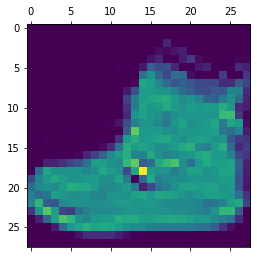

In [57]:
img_tensor = image.img_to_array(train_images[0])
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor = img_tensor.astype(np.float32) / 255.0
print(img_tensor.shape)
layer_outputs = [layer.output for layer in model.layers[:9]] 
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) 
activations = activation_model.predict(img_tensor)
first_layer_activation = activations[0]
print(first_layer_activation.shape)
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

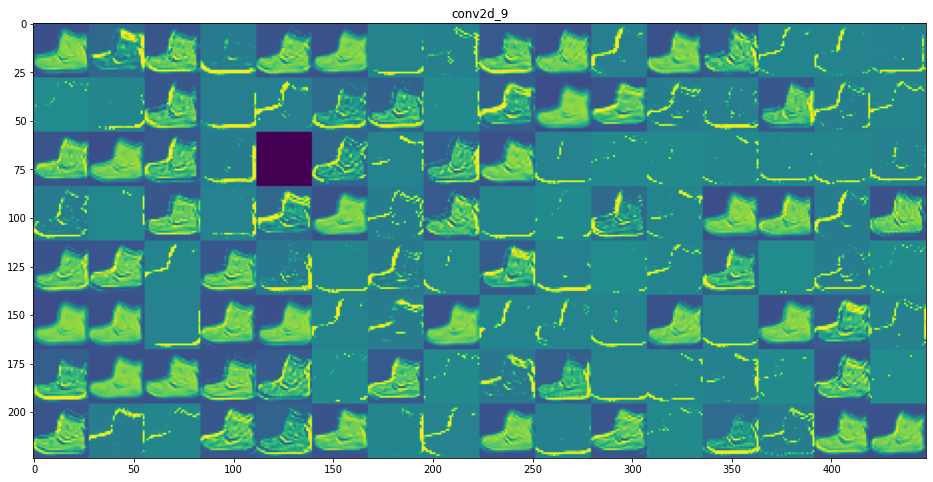

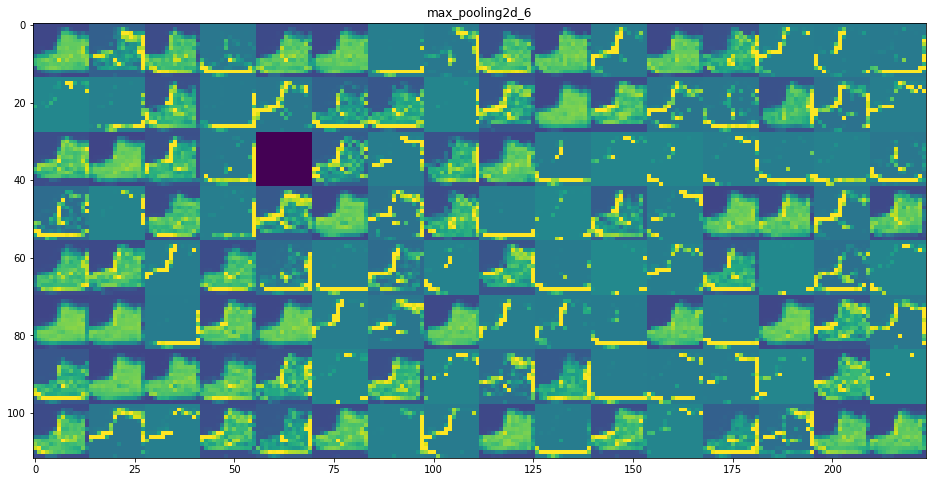

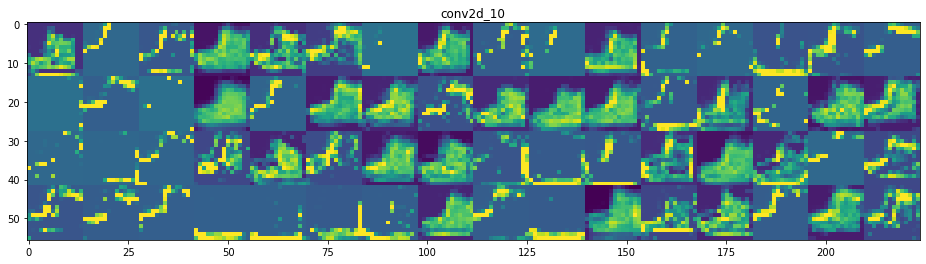

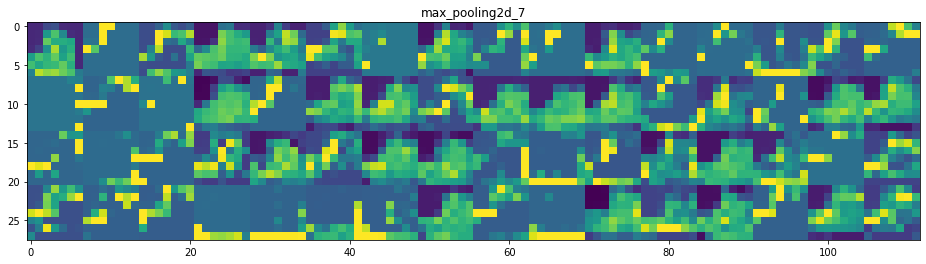

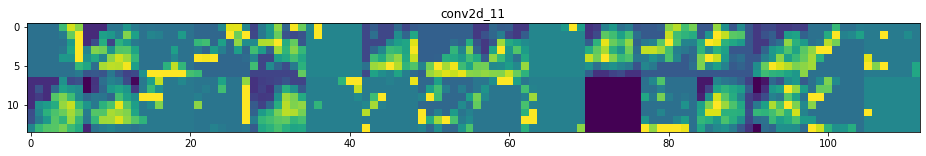

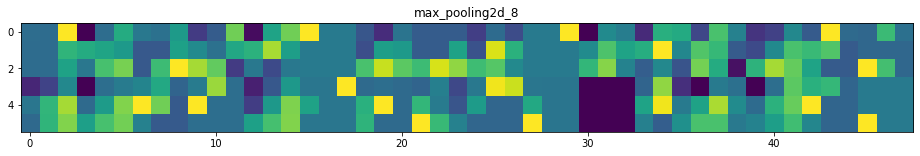

In [53]:
layer_names = []
for layer in model.layers[:6]:
    layer_names.append(layer.name) 
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): 
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :,col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


Conclusion: On Fashion MNIST dataset, using existing models we have achieved almost the same accuracy as we achieved during MLP. However, In CNN this metric can increase if we add more layers and tune the model

Visulising the images after passing through each layer is taken from : [link](https://github.com/gabrielpierobon/cnnshapes/blob/master/README.md)

### CNN on Cifar10

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 8s 0us/step


In [8]:
print("train_images shape: " + str(train_images.shape))
print("train_labels shape: " + str(train_labels.shape))
print("test_images shape: " + str(test_images.shape))
print("test_labels shape: " + str(test_labels.shape))
print("total number of training samples: " + str(train_images.shape[0]))
print("total number of test samples: " + str(test_images.shape[0]))

train_images shape: (50000, 32, 32, 3)
train_labels shape: (50000, 1)
test_images shape: (10000, 32, 32, 3)
test_labels shape: (10000, 1)
total number of training samples: 50000
total number of test samples: 10000


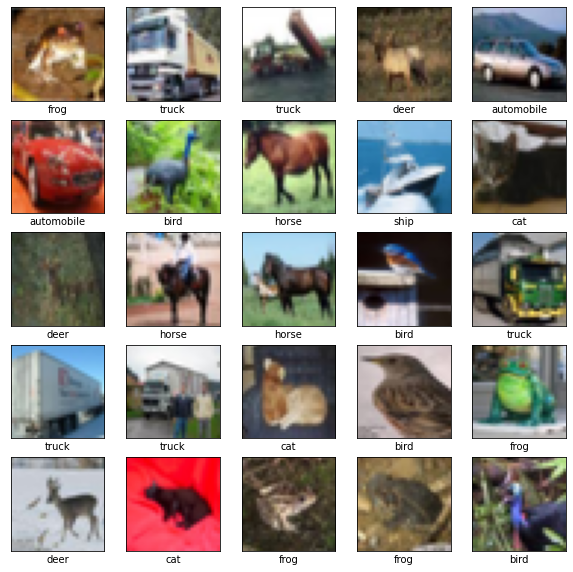

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [0]:
train_data = tf.data.Dataset.from_tensor_slices(( train_images.astype(np.float32)/255.0, train_labels.astype(np.int32) ))

train_data = train_data.shuffle(buffer_size = train_images.shape[0]).batch(256)

test_data = tf.data.Dataset.from_tensor_slices(( test_images.astype(np.float32)/255.0, test_labels.astype(np.int32) ))

test_data = test_data.batch(256)

In [0]:
model = models.Sequential([layers.Conv2D(64,(3,3),activation='relu',padding='same',bias_initializer="glorot_uniform",input_shape=(32,32,3)),
                          layers.BatchNormalization(),
                          layers.Conv2D(64,(3,3),activation='relu',padding='same',kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"),
                          layers.BatchNormalization(), 
                          layers.MaxPooling2D(),
                          layers.Dropout(0.3),
                           
                          layers.Conv2D(128,(3,3),activation='relu',padding='same',bias_initializer="glorot_uniform"),
                          layers.BatchNormalization(),
                          layers.Conv2D(128,(3,3),activation='relu',padding='same',kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"),
                          layers.BatchNormalization(), 
                          layers.MaxPooling2D(),
                          layers.Dropout(0.4),

                          layers.Conv2D(256,(3,3),activation='relu',padding='same',bias_initializer="glorot_uniform"),
                          layers.BatchNormalization(),
                          layers.Conv2D(256,(3,3),activation='relu',padding='same',kernel_initializer= "he_uniform" ,bias_initializer="glorot_uniform"),
                          layers.BatchNormalization(), 
                          layers.MaxPooling2D(),
                          layers.Dropout(0.5), 
                           
                          layers.Flatten(), 
                          layers.Dense(64, activation='relu'), 
                          layers.Dense(100) ])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       7

In [0]:
# Instantiate an optimizer.
optimizer = keras.optimizers.Adam(learning_rate=  5 * 1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Prepare the metrics.
train_acc_metric = keras.metrics.SparseCategoricalAccuracy()
val_acc_metric = keras.metrics.SparseCategoricalAccuracy()

In [58]:
epochs=15
for epoch in range(epochs):
  print("===== epoch number: {}".format(epoch))

  for step, (x_batch_train, y_batch_train) in enumerate(train_data):

    with tf.GradientTape() as tape:
      logits = model(x_batch_train, training=True)
      
      loss_value = loss_fn(y_batch_train, logits)

    grads = tape.gradient(loss_value, model.trainable_weights)
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    # Update training metric.
    train_acc_metric(y_batch_train, logits)

    # # Log every 200 batches.
    if step % 256 == 0:
        print('Training loss (for one batch) at step %s: %s' % (step, float(loss_value)))
        print('Seen so far: %s samples' % ((step + 1) * 256))

  # Display metrics at the end of each epoch.
  # print("Total number of samples: %d" %(int((step+1)*256)))
  # print("\n") 
  train_acc = train_acc_metric.result()
  print('Training acc over epoch: %s' % (float(train_acc),))
  # Reset training metrics at the end of each epoch
  train_acc_metric.reset_states()

  for x_batch_val, y_batch_val in test_data:
    val_logits = model(x_batch_val)
    # Update val metrics
    val_acc_metric(y_batch_val, val_logits)
  val_acc = val_acc_metric.result()
  val_acc_metric.reset_states()
  print('Validation acc: %s' % (float(val_acc),))

===== epoch number: 0
Training loss (for one batch) at step 0: 6.24515438079834
Seen so far: 256 samples
Training acc over epoch: 0.3829199969768524
Validation acc: 0.14920000731945038
===== epoch number: 1
Training loss (for one batch) at step 0: 1.454630970954895
Seen so far: 256 samples
Training acc over epoch: 0.5638999938964844
Validation acc: 0.349700003862381
===== epoch number: 2
Training loss (for one batch) at step 0: 1.0362387895584106
Seen so far: 256 samples
Training acc over epoch: 0.6535400152206421
Validation acc: 0.6101999878883362
===== epoch number: 3
Training loss (for one batch) at step 0: 0.866364598274231
Seen so far: 256 samples
Training acc over epoch: 0.7191399931907654
Validation acc: 0.6931999921798706
===== epoch number: 4
Training loss (for one batch) at step 0: 0.7107857465744019
Seen so far: 256 samples
Training acc over epoch: 0.7580999732017517
Validation acc: 0.694100022315979
===== epoch number: 5
Training loss (for one batch) at step 0: 0.7604206800

Conclusion: Used VGG-16 style based approach to get Test accuracy of 84% was reached after using batchout and dropout regularization techniques. Even though overfitting was not prevented completely
Without these test accuracy stays < 75% and results in severe overfit

### Experimentation with Strides, filter size and layers

**Playing with filter Size**

Summary:

1) Filter sizes of (7, 7) and (5, 5) increased number of parameters to be trained from (3, 3) filter causing longer training time. Also (3,3) filter was able to capture much better information than larger filters as Cifar is comparitively smaller resolution images of 32,32 size. For larger imager(1 Megapixel ==> 1024, 1024) maybe larger filter may be helpful


2) Extremely large filter size of (32, 32) almost the size of the image. This ballooned up the number of parameters to be trained to around 6 million and gave really poor results than smaller filter. (32, 32) filters are trying to capture patterns that are too complex and non-sharable between different parts of image. Hence learnt parameters are not reused for other parts of the image causing this failure.


3) Extremely small filter (1, 1) as first convolution layer of 256 filters. it resulted in really less paramters and also it could be used to reduce number of channels hence number of params to be trained. Helpful before handing data over from Convolution to dense layer. As expected a single pixel is too general and caused failure while testing. As expected it underfits achieveing around 50% on test data, but muich better than option 2

**Playing with the Strides**

Summary:


1) Applying no strides balloons up the number of parameters to be trained and also lot of redundant things to be learnt in next layer. Hence this did not train faster for same number of epochs as other variants and gave relatively poor answer


2) Applying strides to the first layer itself too causes a little dip in final outcome as it is always better to hold redundant information at begining layers else it may cause some info to be missed.


3) Applying strides of (6, 6) in second or third layer which would miss some inputs of recptive field worked well enough. As first layer did not have any strides it captured most of the basic patterns, In subsequent layers, even though strides (6, 6) missed some neurons it was ok as there was enough info from first layer to cover it up. The number of params decreased by 6 fold boosting training time

**Playing with Pooling layers**

Summary:


1) Average pooling worked better than max pooling for this case and model. Maybe while averaging the target pixel would contain some information from all neighbouring pixel but for max only one pixel contributes


2) Using pooling layers of larger sizes yeilds less parameters, but its accuracy drops as more information would be lost when we pool it. Hence pooling should be done in limited manner
